<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Perceptron on XOR Gates](#Q2)
3. [Multilayer Perceptron](#Q3)
4. [Keras MMP](#Q4)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:**
A Neuron is a single node within a neural network, it takes an input has bias and weight values and an activation function. A perceptron can also be considered a Neuron.
- **Input Layer:**
The Input Layer is where data flows into a neural network, the input layer must have the same dimensions as the data which is being fed in. The input layer passes each 
- **Hidden Layer:**
Hidden Layers are Neurons within a Neural Network which accept input from either the input layer or a previous hidden layer. Like all neurons each neuron in the hidden layer 
- **Output Layer:**
The output layer is the end result of the neural network, it's shape will be the same as the data you're trying to predict.
- **Activation:**
An activation function takes the result of a node's input * weight + bias as input and if the result is sufficient the node activates.
- **Backpropagation:**
Backpropagation takes the passes the error (desired output - predicted output) from the output layer back down the network and adjusts the weights of the network based off how much the nodes affected the final result.

## 2. Perceptron on XOR Gates <a id="Q2"></a>

The XOr, or “exclusive or”, problem is a classic problem in ANN research. It is the problem of using a neural network to predict the outputs of XOr logic gates given two binary inputs. An XOr function should return a true value if the two inputs are not equal and a false value if they are equal. Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

|x1	|x2 | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |
| 1 | 0 | 1 |


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd

In [202]:
X = np.array([[0.0,0.0],
             [0.0,1.0],
             [1.0,1.0],
             [1.0,0.0]])
y = np.array([0.0, 1.0, 0.0, 1.0])

In [213]:
class Perceptron:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def fit(self,X, y, epochs=10):
        self.weights = np.zeros(1+X.shape[1])
        self.errors = []
        for i in range(epochs):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.lr * (target - self.predict(xi))
                self.weights[1:] += delta_w * xi
                self.weights[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1.0, 0.0)

In [216]:
pn = Perceptron(0.01)
pn.fit(X, y, 10)

In [219]:
pn.predict(X)

array([1., 1., 1., 1.])

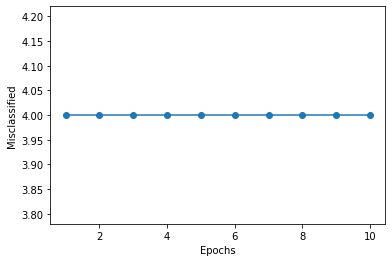

In [218]:
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassified')
plt.show()

In [ ]:
# Guess I need to put some more time into this later...

## 3. Multilayer Perceptron <a id="Q3"></a>

Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights.
Your network must have one hidden layer.
You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
Train your model on the Heart Disease dataset from UCI:



In [179]:
class NeuralNet:
    def __init__(self, inputs, hiddenNodes, outputNodes):
        self.inputs = inputs
        self.hiddenNodes = hiddenNodes
        self.outputNodes = outputNodes
        
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def forward(self, X):
        # multiply inputs by weights of first hidden node
        self.hidden_sum = np.dot(X, self.weights1)
        # pass values through sigmoid function to decide activation
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        # multiply hidden output by output layer weights
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        # pass output values through sigmoid to determine output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        # Subtract result from feeding foward from
        # actual output to determine error rate
        self.o_error = y - o
        # Use derivative of the output(from sigmoid function)
        # multiplied by error
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        
        self.z2_error = self.o_delta.dot(self.weights2.T)
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        
        self.weights1 += X.T.dot(self.z2_delta)
        
    def train(self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)
        

In [28]:
from sklearn.datasets import fetch_openml

heartdisease = fetch_openml(data_id=194)

In [180]:
X = pd.DataFrame(heartdisease['data'])

In [181]:
X = X.fillna(value=0.0).values

In [99]:
X.shape

(303, 13)

In [100]:
y.shape

(303,)

In [195]:
y = heartdisease['target']
y = to_categorical(y)

In [46]:
y.min()

0.0

In [196]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, shuffle=True)

In [186]:
X_train.shape

(203, 13)

In [191]:
y_train = y_train.reshape(203, 1)

In [197]:
NN = NeuralNet(13, 30, 5)

In [198]:
NN.train(X_train, y_train)

In [199]:
for i in range(1000):
    if (i == 0) or ((i+1) % 100 == 0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X_train)
        print('Actual Output: \n', y_train)
        print('Predicted Output: \n', str(NN.forward(X_train)))
        print("Loss: \n", str(np.mean(np.square(y_train - NN.forward(X_train)))))
        
    NN.train(X_train,y_train) 

+---------EPOCH 1---------+
Input: 
 [[41.  0.  2. ...  0.  0.  1.]
 [67.  1.  2. ...  1.  0.  2.]
 [51.  1.  0. ...  0.  1.  1.]
 ...
 [53.  0.  1. ...  0.  0.  1.]
 [65.  0.  2. ...  0.  1.  1.]
 [51.  0.  2. ...  0.  0.  1.]]
Actual Output: 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
Predicted Output: 
 [[9.98241108e-01 8.24819324e-01 6.88872497e-77 1.01552039e-63
  1.04295890e-03]
 [9.98241108e-01 8.24819324e-01 6.88872497e-77 1.01552039e-63
  1.04295890e-03]
 [9.98241108e-01 8.24819324e-01 6.88872497e-77 1.01552039e-63
  1.04295890e-03]
 ...
 [9.98241108e-01 8.24819324e-01 6.88872497e-77 1.01552039e-63
  1.04295890e-03]
 [9.98241108e-01 8.24819324e-01 6.88872497e-77 1.01552039e-63
  1.04295890e-03]
 [9.98241108e-01 8.24819324e-01 6.88872497e-77 1.01552039e-63
  1.04295890e-03]]
Loss: 
 0.26199639690842735
+---------EPOCH 100---------+
Input: 
 [[41.  0.  2. ...  0.  0.  1.]
 [67.  1.  2. ...  1.  0.  2.]
 [51.

In [ ]:
# Looks reasonable.

## 4. Keras MMP <a id="Q4"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [124]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [168]:
def base_model(inputs=13):
    model = Sequential()
    model.add(Dense(30, activation='relu', input_dim=inputs))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [169]:
X = pd.DataFrame(heartdisease['data'])
X = X.fillna(value=0.0).values
y = heartdisease['target']
y = to_categorical(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, shuffle=True)

In [157]:
X_train[0]

array([ 54. ,   1. ,   1. , 124. , 266. ,   1. ,   0. , 109. ,   1. ,
         2.2,   1. ,   1. ,   2. ])

In [170]:
model = base_model()
model.fit(X_train, y_train, batch_size=32, epochs=20)
scores = model.evaluate(X_val, y_val)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

Train on 203 samples
Epoch 1/20
203/203 [==============================] - 0s 594us/sample - loss: 12.5151 - accuracy: 0.1133
Epoch 2/20
203/203 [==============================] - 0s 30us/sample - loss: 11.4018 - accuracy: 0.1823
Epoch 3/20
203/203 [==============================] - 0s 31us/sample - loss: 11.0922 - accuracy: 0.1478
Epoch 4/20
203/203 [==============================] - 0s 33us/sample - loss: 10.7278 - accuracy: 0.1133
Epoch 5/20
203/203 [==============================] - 0s 37us/sample - loss: 10.5296 - accuracy: 0.1330
Epoch 6/20
203/203 [==============================] - 0s 33us/sample - loss: 10.3746 - accuracy: 0.1626
Epoch 7/20
203/203 [==============================] - 0s 31us/sample - loss: 10.2205 - accuracy: 0.1379
Epoch 8/20
203/203 [==============================] - 0s 32us/sample - loss: 10.0424 - accuracy: 0.1724
Epoch 9/20
203/203 [==============================] - 0s 36us/sample - loss: 9.8871 - accuracy: 0.1773
Epoch 10/20
203/203 [======================

In [171]:
# estimators = []
# estimators.append(('standardize', StandardScaler()))
model = KerasClassifier(build_fn=base_model, verbose=0)
# pipeline = Pipeline(estimators)
param_grid = {'batch_size': [10, 20, 40, 60, 80, 120],
          'epochs': [20]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cvscores = []
# for train, test in kfold.split(X, y):
#     model = base_model(inputs=13)
#     model.fit(X[train], y[train], epochs=150, batch_size=20, verbose=0)
#     scores = model.evaluate(X[test], y[test], verbose=0)
#     print(f'{model.metrics_names[1]}: {(scores[1]*100):.2f}%')
#     cvscores.append(scores[1]*100)

# print(f'{np.mean(cvscores):.2f}% +/- {np.std(cvscores):.2f}%')

In [172]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.41584159930547077 using {'batch_size': 10, 'epochs': 20}
Means: 0.41584159930547077, Stdev: 0.1610750489913242 with: {'batch_size': 10, 'epochs': 20}
Means: 0.2706270714600881, Stdev: 0.18333920990084213 with: {'batch_size': 20, 'epochs': 20}
Means: 0.277227724591891, Stdev: 0.21142729609902622 with: {'batch_size': 40, 'epochs': 20}
Means: 0.2805280536413193, Stdev: 0.2096164336235203 with: {'batch_size': 60, 'epochs': 20}
Means: 0.26072607934474945, Stdev: 0.18190778532074292 with: {'batch_size': 80, 'epochs': 20}
Means: 0.3300330173224211, Stdev: 0.21332492908764966 with: {'batch_size': 120, 'epochs': 20}


In [173]:
param_grid = {'batch_size': [10],
          'epochs': [20, 40, 60, 80, 100]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.5412541429201762 using {'batch_size': 10, 'epochs': 60}
Means: 0.13861386477947235, Stdev: 0.037046113647242716 with: {'batch_size': 10, 'epochs': 20}
Means: 0.257425744086504, Stdev: 0.22330336981061608 with: {'batch_size': 10, 'epochs': 40}
Means: 0.5412541429201762, Stdev: 0.02333685050997706 with: {'batch_size': 10, 'epochs': 60}
Means: 0.30363036692142487, Stdev: 0.19153291541841347 with: {'batch_size': 10, 'epochs': 80}
Means: 0.41584159433841705, Stdev: 0.18363601775050853 with: {'batch_size': 10, 'epochs': 100}
